In [1]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

/home/asad/anaconda3/envs/robo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/asad/anaconda3/envs/robo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/asad/anaconda3/envs/robo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/asad/anaconda3/envs/robo/lib/python3.6/site-packages

In [2]:
def get_section_results(file):
    eval_returns = {}
    for e in summary_iterator(file):
        for v in e.summary.value:
            if v.tag not in eval_returns:
                eval_returns[v.tag] = [v.simple_value]
            else:
                eval_returns[v.tag].append(v.simple_value)
    return eval_returns

In [3]:
q1_ant = get_section_results('data/q1_bc_ant_Ant-v2_09-11-2021_16-55-44/events.out.tfevents.1636473344.scar')
q2_ant = get_section_results('data/q2_dagger_ant_Ant-v2_09-11-2021_16-57-09/events.out.tfevents.1636473429.scar')
q1_human = get_section_results('data/q1_bc_humanoid_Humanoid-v2_09-11-2021_16-56-19/events.out.tfevents.1636473379.scar')
q2_human = get_section_results('data/q2_dagger_humanoid_Humanoid-v2_09-11-2021_17-00-11/events.out.tfevents.1636473611.scar')

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Text(0, 0.5, 'Return')

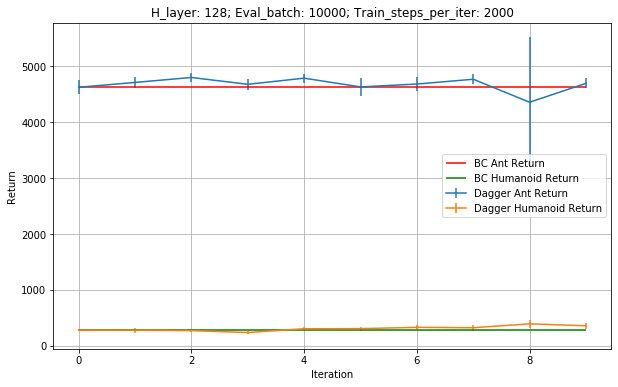

In [4]:
q2_ant_return = q2_ant['Eval_AverageReturn']
q2_ant_std = q2_ant['Eval_StdReturn']
q2_human_return = q2_human['Eval_AverageReturn']
q2_human_std = q2_human['Eval_StdReturn']
x = np.arange(len(q2_ant_return))
plt.figure(figsize=(10, 6))
plt.errorbar(x, q2_ant_return, q2_ant_std, label = 'Dagger Ant Return')
plt.errorbar(x, q2_human_return, q2_human_std, label = 'Dagger Humanoid Return')
plt.hlines(q1_ant['Eval_AverageReturn'][0], 0, 9, label='BC Ant Return', color = 'r')
plt.hlines(q1_human['Eval_AverageReturn'][0], 0, 9, label='BC Humanoid Return', color = 'g')
#plt.hlines(q1_human['Train_AverageReturn'][0], 0, 9, label='Expert Humanoid Return', color = 'purple')
#plt.hlines(q1_ant['Train_AverageReturn'][0], 0, 9, label='Expert Ant Return')

plt.legend()
plt.grid()
plt.title("H_layer: 128; Eval_batch: 10000; Train_steps_per_iter: 2000")
plt.xlabel("Iteration")
plt.ylabel('Return')

In [5]:
q1_ant = get_section_results('data/q1_bc_ant_Ant-v2_09-11-2021_16-41-27/events.out.tfevents.1636472487.scar')
q2_ant = get_section_results('data/q2_dagger_ant_Ant-v2_09-11-2021_16-48-22/events.out.tfevents.1636472902.scar')
q1_human = get_section_results('data/q1_bc_humanoid_Humanoid-v2_09-11-2021_16-42-03/events.out.tfevents.1636472523.scar')
q2_human = get_section_results('data/q2_dagger_humanoid_Humanoid-v2_09-11-2021_16-50-11/events.out.tfevents.1636473011.scar')

Text(0, 0.5, 'Return')

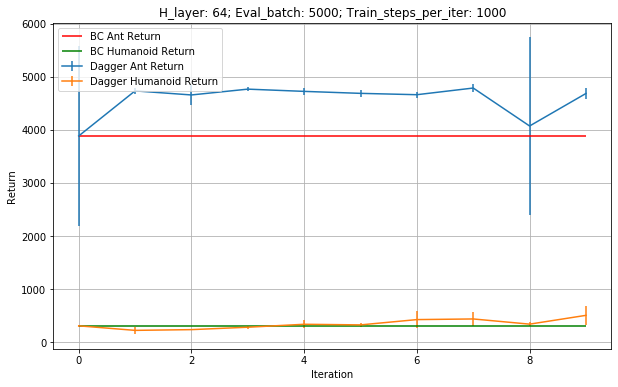

In [6]:
q2_ant_return = q2_ant['Eval_AverageReturn']
q2_ant_std = q2_ant['Eval_StdReturn']
q2_human_return = q2_human['Eval_AverageReturn']
q2_human_std = q2_human['Eval_StdReturn']
x = np.arange(len(q2_ant_return))
plt.figure(figsize=(10, 6))
plt.errorbar(x, q2_ant_return, q2_ant_std, label = 'Dagger Ant Return')
plt.errorbar(x, q2_human_return, q2_human_std, label = 'Dagger Humanoid Return')
plt.hlines(q1_ant['Eval_AverageReturn'][0], 0, 9, label='BC Ant Return', color = 'r')
plt.hlines(q1_human['Eval_AverageReturn'][0], 0, 9, label='BC Humanoid Return', color = 'g')
#plt.hlines(q1_human['Train_AverageReturn'][0], 0, 9, label='Expert Humanoid Return', color = 'purple')
#plt.hlines(q1_ant['Train_AverageReturn'][0], 0, 9, label='Expert Ant Return')

plt.legend()
plt.grid()
plt.title("H_layer: 64; Eval_batch: 5000; Train_steps_per_iter: 1000")
plt.xlabel("Iteration")
plt.ylabel('Return')